In [11]:
import pandas as pd

In [16]:
data = pd.read_csv('Netflix_Analysis_ready.csv')

In [17]:
print(data.info())

print(data.head())

print(data[['Score', 'Comments']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     438 non-null    object
 1   CONTENT   438 non-null    object
 2   Score     438 non-null    int64 
 3   Comments  438 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 13.8+ KB
None
                                               TITLE  \
0  whats a show on netflix you just couldnt stop ...   
1                       finally cancelled my netflix   
2                   can netflix finish a series rant   
3         netflix keeps checking internet connection   
4                      one day netflix show spoilers   

                                             CONTENT  Score  Comments  
0  looking to binge a new show open to all genres...   1122      2274  
1  i finally cancelled my netflix account price g...    705       446  
2  netflix has a history of burning good shows to...    525

**Analyze the aggregation of sentiment scores:**
VADER calculates a sentiment score, known as the "compound" score, for each sentence or text in 'CONTENT'. This score is comprehensive and based on the polarity scores of words along with adjustment factors. It ranges from -1 to 1, where -1 represents an extremely negative sentiment, 1 represents an extremely positive sentiment, and 0 represents neutral sentiment.

In [138]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Text cleaning and tokenization function
def clean_text(text):
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in cleaned_tokens if word not in stop_words]
    return cleaned_tokens

# Sentiment analysis function
def sentiment_analysis(text):
    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)['compound']
    return round(score, 2)

# Applying cleaning and sentiment analysis functions
data['Cleaned_Content'] = data['CONTENT'].apply(clean_text)
data['Sentiment_Score'] = data['CONTENT'].apply(sentiment_analysis)

# Displaying results
print(data[['CONTENT', 'Cleaned_Content', 'Sentiment_Score']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                             CONTENT  \
0  looking to binge a new show open to all genres...   
1  i finally cancelled my netflix account price g...   
2  netflix has a history of burning good shows to...   
3  whenever i go to watch something netflix  keep...   
4  bloody hell how the fuck did i think it was a ...   

                                     Cleaned_Content  Sentiment_Score  
0  [looking, binge, new, show, open, genres, does...             0.59  
1  [finally, cancelled, netflix, account, price, ...             0.87  
2  [netflix, history, burning, good, shows, name,...             0.70  
3  [whenever, go, watch, something, netflix, keep...            -0.30  
4  [bloody, hell, fuck, think, movie, hours, late...            -0.74  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


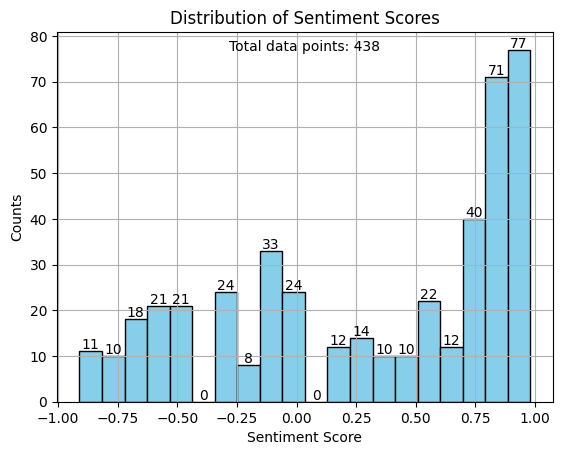

In [152]:
import matplotlib.pyplot as plt

# Create a canvas with multiple subplots
fig, ax = plt.subplots()

# Plot the histogram
n, bins, patches = ax.hist(data['Sentiment_Score'], bins=20, color='skyblue', edgecolor='black')
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Sentiment Scores')

# Add text label for total data points
total_data_points = len(data['Sentiment_Score'])
plt.text(0.5, 0.95, f'Total data points: {total_data_points}', transform=plt.gca().transAxes, horizontalalignment='center', fontsize=10)

# Add the number of data points in each bin
for i in range(len(bins)-1):
    ax.text((bins[i] + bins[i+1])/2, n[i]+0.5, f'{int(n[i])}', ha='center')

plt.grid(True)
plt.show()

**Analysis of Word Frequency in Netflix User Comments:**

---
These visualizations help in quickly understanding the most prevalent topics and sentiments expressed by users regarding Netflix.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


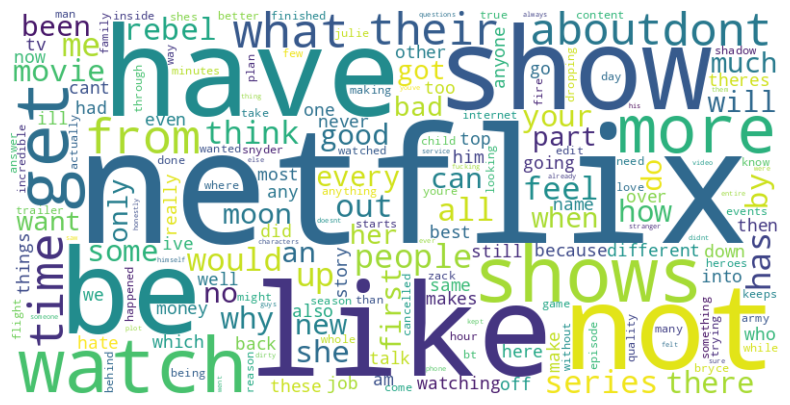

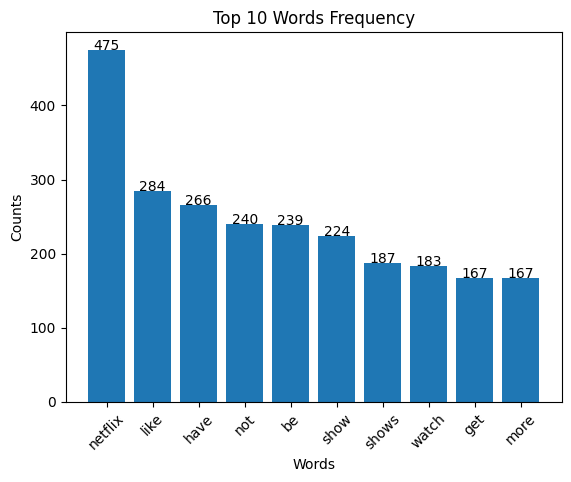

In [165]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Concatenate all comment texts
all_text = ' '.join(data['CONTENT'])

# Data preprocessing: Remove punctuation, digits, and convert to lowercase
all_text = re.sub(r'[^\w\s]', '', all_text)
all_text = re.sub(r'\d+', '', all_text)
all_text = all_text.lower()

# Split text into words
words = all_text.split()

# Remove stopwords (you can customize the stopword list as needed)
stopwords = set(['the','is','and','to','of','a','in','it','that','i','for','you','on','this','with','but','was','im','just','so','are','its','or','my','they','he','if','as','at'])
filtered_words = [word for word in words if word not in stopwords]

# Calculate word frequency
word_freq = Counter(filtered_words)

# Visualize word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Calculate and visualize the top N most frequent words
top_n = 10
top_words = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True)[:top_n])
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title(f'Top {top_n} Words Frequency')
plt.xticks(rotation=45)

# Add counts as text on top of each bar
for i, (word, count) in enumerate(top_words.items()):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.show()


**Topic Modeling of Netflix User Comments analysis : Identifying Themes and Keywords:**
This code performs a topic modelling analysis on user comments from Netflix. The goal is to identify different themes or topics in the comments and extract the keywords associated with each topic using the Latent Dirichlet Allocation (LDA) technique. This analysis provides insights into users' opinions and feedback on various content or services provided by Netflix. The insights and trends that Netflix has extracted can help improve its services and content.

In [149]:
import pandas as pd
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Custom text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Return the preprocessed text
    return tokens

# Apply text preprocessing to the data
data['preprocessed_content'] = data['CONTENT'].apply(preprocess_text)

# Create a bag-of-words representation
dictionary = Dictionary(data['preprocessed_content'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed_content']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=5, # Set the number of topics
                     passes=10,    # Number of iterations
                     random_state=42)

# Output the keywords for each topic
for topic_id, topic_keywords in lda_model.print_topics():
    print(f'Topic {topic_id+1}: {topic_keywords}')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.034*"rebel" + 0.028*"moon" + 0.016*"part" + 0.016*"zack" + 0.014*"netflix" + 0.012*"armi" + 0.012*"snyder" + 0.012*"seri" + 0.010*"good" + 0.010*"im"
Topic 2: 0.032*"like" + 0.016*"movi" + 0.014*"want" + 0.012*"netflix" + 0.011*"watch" + 0.010*"show" + 0.010*"feel" + 0.009*"peopl" + 0.009*"trailer" + 0.009*"make"
Topic 3: 0.028*"show" + 0.020*"netflix" + 0.018*"get" + 0.017*"like" + 0.015*"peopl" + 0.014*"im" + 0.014*"think" + 0.013*"job" + 0.013*"answer" + 0.011*"dont"
Topic 4: 0.032*"netflix" + 0.028*"show" + 0.015*"im" + 0.015*"watch" + 0.013*"would" + 0.011*"cancel" + 0.009*"time" + 0.009*"look" + 0.008*"like" + 0.008*"still"
Topic 5: 0.025*"watch" + 0.018*"netflix" + 0.013*"time" + 0.013*"show" + 0.011*"actual" + 0.010*"plan" + 0.010*"thing" + 0.009*"top" + 0.009*"happen" + 0.009*"hour"


In [148]:
pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
import pyLDAvis.gensim_models
import pyLDAvis

# Create interactive visualization of topics
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display the visualization in Python
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Analysis of Netflix Title Sentiment and User Feedback:**
This code performs sentiment analysis on user comments for Netflix titles. It calculates the sentiment score for each comment using the VADER sentiment analyzer and then aggregates the scores to compute the average for each title. The code also calculates statistics such as maximum and minimum scores and prints them out, along with the average sentiment score and comments count. This helps understand the overall feedback and sentiment associated with different titles on Netflix.


In [186]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each content and add a column for sentiment score
data['Sentiment_Score'] = data['CONTENT'].apply(lambda x: round(sid.polarity_scores(x)['compound'], 2))

# Calculate the average sentiment score for each title
title_sentiment_mean = data.groupby('TITLE')['Sentiment_Score'].mean()

# Calculate the number of categories for titles
title_categories = data['TITLE'].value_counts()

# Group by title and calculate the maximum, minimum, and average scores for each title
title_stats = data.groupby('TITLE')['Score'].agg(['max', 'min', 'mean'])

# Print each title along with its statistics
for title, count in title_categories.items():
    max_score, min_score, avg_score = title_stats.loc[title]
    avg_score = round(avg_score, 2)  # Round to two decimal places
    avg_sentiment = round(title_sentiment_mean[title], 2)  # Get the average sentiment score for the title and round to two decimal places
    print("Title:", title)
    print("Count:", count)
    print("Max score:", max_score)
    print("Min score:", min_score)
    print("Average score:", avg_score)
    print("Average sentiment score:", avg_sentiment)
    print("--------------------------")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Title: netflix the day i see an ad while watching a movie or tv i will unsubscribe
Count: 14
Max score: 63415.0
Min score: 63401.0
Average score: 63407.79
Average sentiment score: -0.27
--------------------------
Title: netflix new autoplay trailers are so annoying
Count: 14
Max score: 14443.0
Min score: 14428.0
Average score: 14435.71
Average sentiment score: 0.29
--------------------------
Title: netflix has cloverfield 
Count: 13
Max score: 5624.0
Min score: 5608.0
Average score: 5616.85
Average sentiment score: 0.0
--------------------------
Title: mh the plane that disappeared netflix seriously made a lemmino video into a  hour netflix series
Count: 12
Max score: 685.0
Min score: 674.0
Average score: 679.5
Average sentiment score: 0.15
--------------------------
Title: finally cancelled my netflix
Count: 12
Max score: 706.0
Min score: 694.0
Average score: 700.42
Average sentiment score: 0.87
--------------------------
Title: megapost netflix  rebel moon part   a child of fire
Coun

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each content and add a column for sentiment score
data['Sentiment_Score'] = data['CONTENT'].apply(lambda x: round(sid.polarity_scores(x)['compound'], 2))

# Calculate the number of comments for each title and get the top 10 titles
title_counts = data['TITLE'].value_counts().sort_values(ascending=False).head(10)

# Calculate the maximum score for each title and get the top 10 titles
title_max_scores = data.groupby('TITLE')['Score'].max().sort_values(ascending=False).head(10)

# Calculate the average score for each title, round to two decimal places, and get the top 10 titles
title_avg_scores = data.groupby('TITLE')['Score'].mean().sort_values(ascending=False).head(10).round(2)

# Calculate the average sentiment score for each title and get the top 10 titles
title_avg_sentiments = data.groupby('TITLE')['Sentiment_Score'].mean().sort_values(ascending=False).head(10)

print("Top 10 titles by comment count:")
print(title_counts)
print("\nTop 10 titles by maximum score:")
print(title_max_scores)
print("\nTop 10 titles by average score:")
print(title_avg_scores)
print("\nTop 10 titles by average sentiment score:")
print(title_avg_sentiments)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 titles by comment count:
TITLE
netflix the day i see an ad while watching a movie or tv i will unsubscribe                         14
netflix new autoplay trailers are so annoying                                                       14
netflix has cloverfield                                                                             13
mh the plane that disappeared netflix seriously made a lemmino video into a  hour netflix series    12
finally cancelled my netflix                                                                        12
megapost netflix  rebel moon part   a child of fire                                                 12
wtf happened to the netflix documentaries                                                           12
im shion takeuchi the creator of the show inside job on netflix ama                                 12
in your opinion whats the best show netflix have ever produced                                      12
the netflix top  is so depressing  

**Top 10 titles by comment count**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


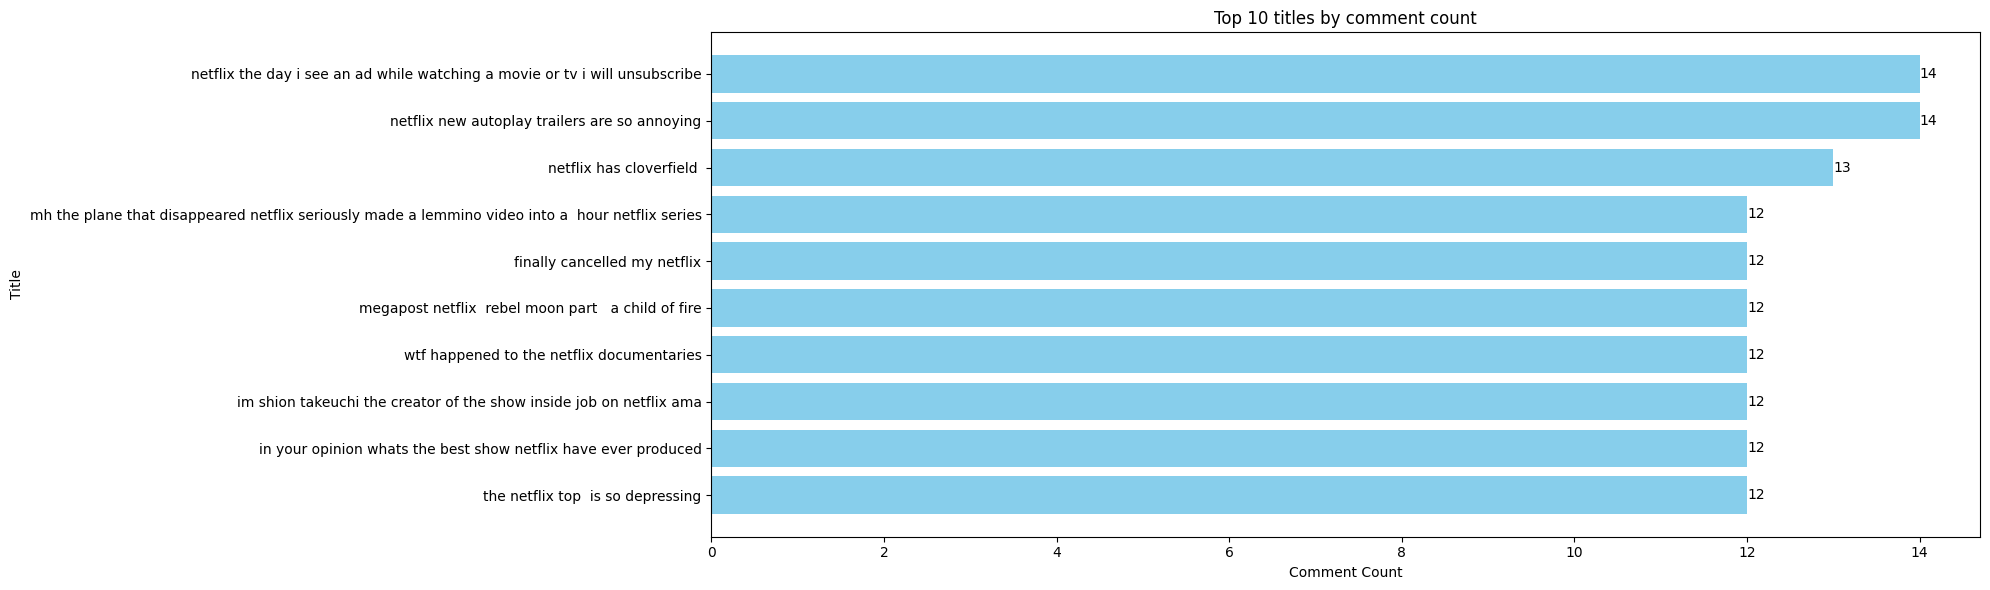

In [228]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Netflix_Analysis_ready.csv')

# Calculate the number of comments for each title and get the top 10 titles
title_counts = data['TITLE'].value_counts().sort_values(ascending=False).head(10)

# Reverse the order to make the highest count first
title_counts = title_counts.iloc[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.barh(title_counts.index, title_counts.values, color='skyblue')
plt.title('Top 10 titles by comment count')
plt.xlabel('Comment Count')
plt.ylabel('Title')


for i, value in enumerate(title_counts.values):
    plt.text(value, i, str(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


**Top 10 titles by maximum score**



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


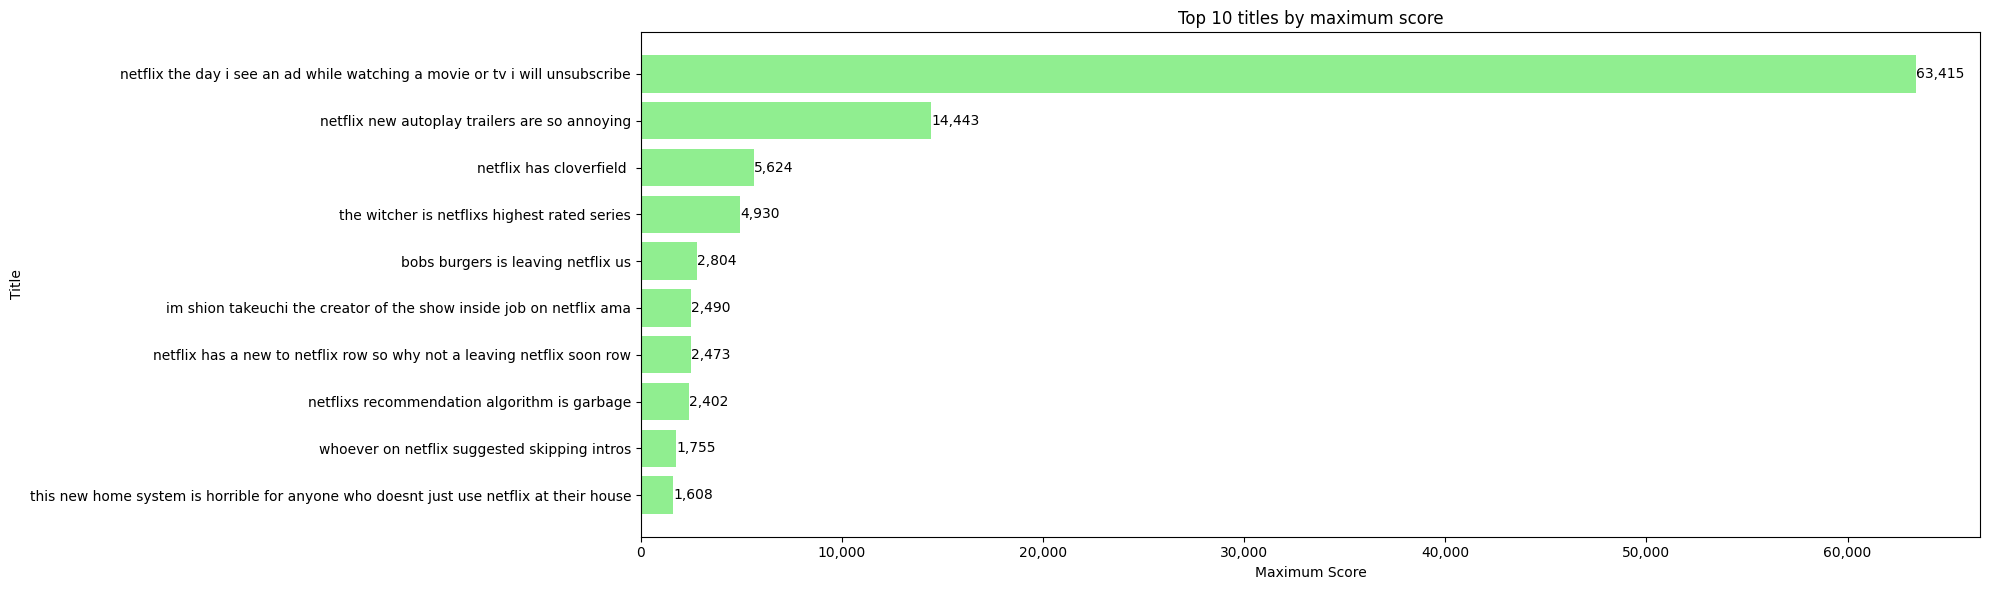

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Calculate the maximum score for each title and get the top 10 titles
title_max_scores = data.groupby('TITLE')['Score'].max().sort_values(ascending=False).head(10)

# Reverse the order
title_max_scores = title_max_scores.iloc[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.barh(title_max_scores.index, title_max_scores.values, color='lightgreen')
plt.title('Top 10 titles by maximum score')
plt.xlabel('Maximum Score')
plt.ylabel('Title')

# Add numbers on top of each bar with thousand separator and no decimal places
for i, value in enumerate(title_max_scores.values):
    score_str = '{:,.0f}'.format(value)  # Add thousand separator and no decimal places
    plt.text(value, i, score_str, ha='left', va='center', fontsize=10, color='black')

# Add thousand separator to x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()



**Top 10 titles by average score**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


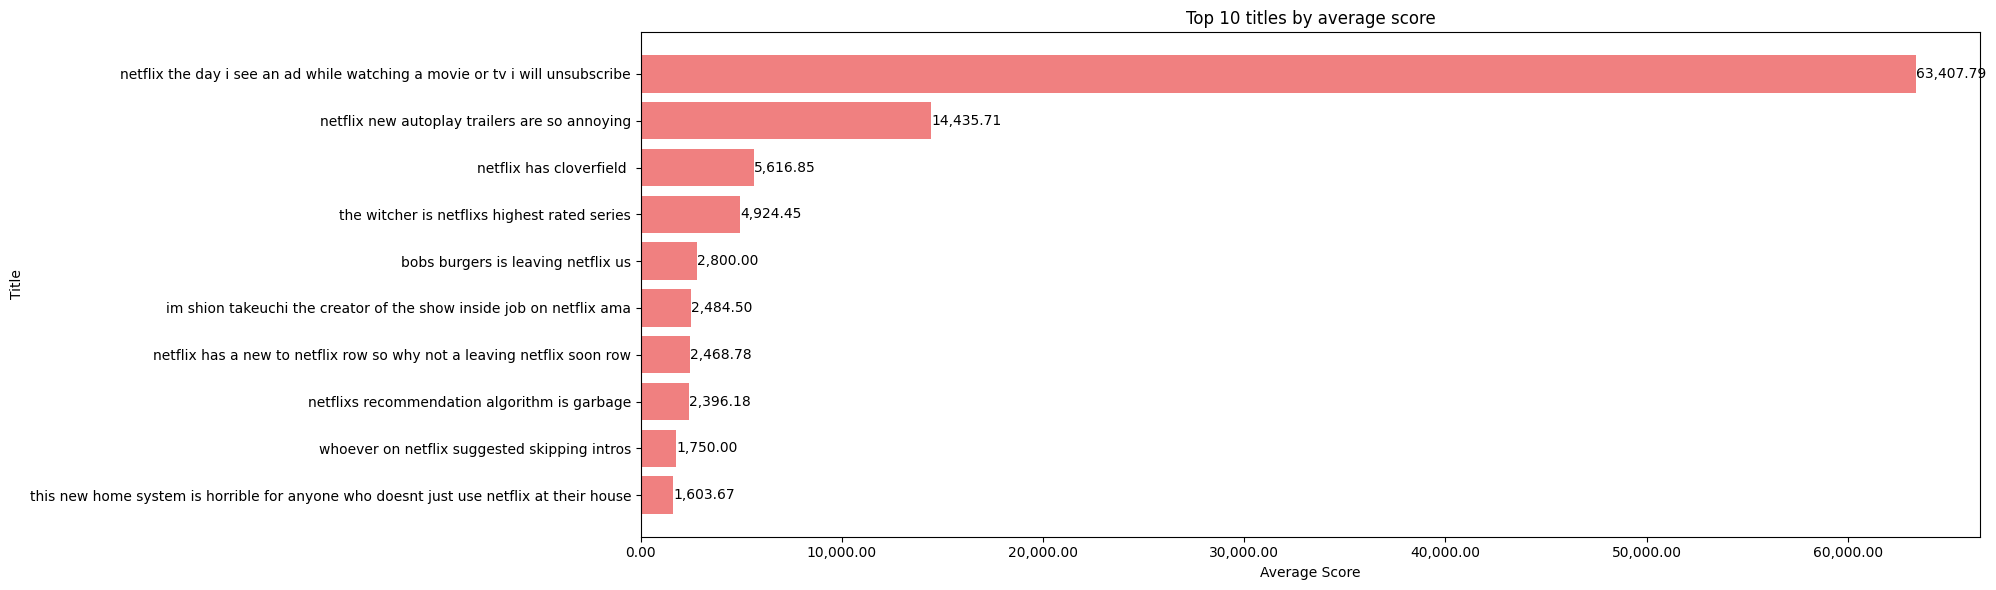

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')

# Calculate the average score for each title, round to two decimal places, and get the top 10 titles
title_avg_scores = data.groupby('TITLE')['Score'].mean().sort_values(ascending=False).head(10).round(2)

# Reverse the order
title_avg_scores = title_avg_scores.iloc[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.barh(title_avg_scores.index, title_avg_scores.values, color='lightcoral')
plt.title('Top 10 titles by average score')
plt.xlabel('Average Score')
plt.ylabel('Title')

# Add numbers on top of each bar with thousand separator
for i, value in enumerate(title_avg_scores.values):
    score_str = '{:,.2f}'.format(value)  # Add thousand separator and round to two decimal places
    plt.text(value, i, score_str, ha='left', va='center', fontsize=10, color='black')

# Add thousand separator to x-axis
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.2f}'.format(x)))

plt.tight_layout()
plt.show()

**Top 10 titles by average sentiment score**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


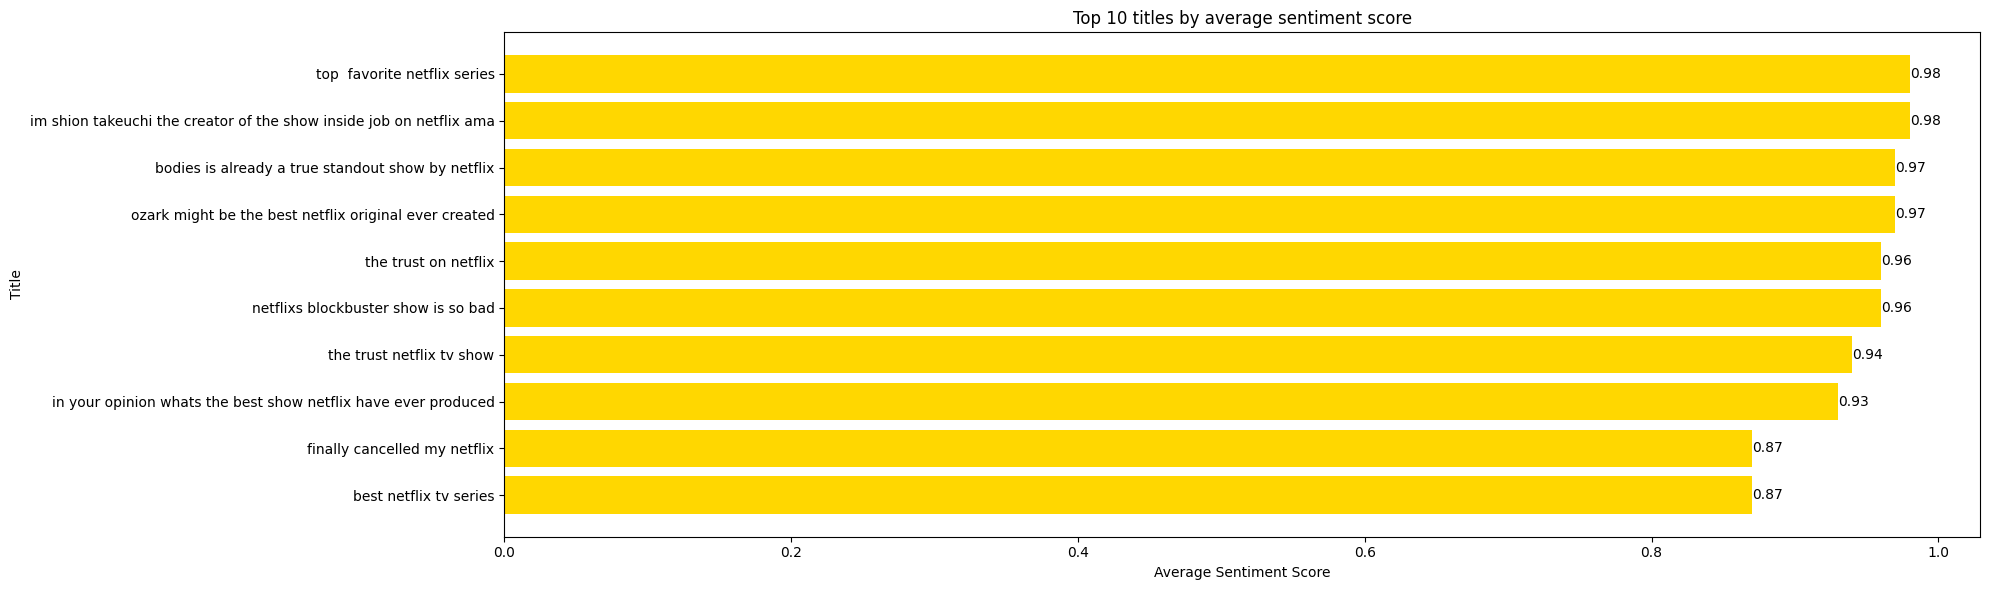

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Read the data
data = pd.read_csv('Netflix_Analysis_ready.csv')
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each content and add a column for sentiment score
data['Sentiment_Score'] = data['CONTENT'].apply(lambda x: round(sid.polarity_scores(x)['compound'], 2))

# Calculate the average sentiment score for each title and get the top 10 titles
title_avg_sentiments = data.groupby('TITLE')['Sentiment_Score'].mean().sort_values(ascending=False).head(10)

# Reverse the order
title_avg_sentiments = title_avg_sentiments.iloc[::-1]

# Plotting
plt.figure(figsize=(20, 6))
plt.barh(title_avg_sentiments.index, title_avg_sentiments.values, color='gold')
plt.title('Top 10 titles by average sentiment score')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Title')

# Add numbers on top of each bar
for i, value in enumerate(title_avg_sentiments.values):
    plt.text(value, i, '{:.2f}'.format(value), ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

